In [286]:
# Original Code source: Jaques Grobler: https://scikit-learn.org/stable/auto_examples/linear_model/plot_ols.html
# License: BSD 3 clause
# Modified by SR

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn import datasets
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, \
                            r2_score, root_mean_squared_error


from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from sklearn.ensemble import HistGradientBoostingRegressor

## The dataset

https://scikit-learn.org/stable/datasets/toy_dataset.html#diabetes-dataset

Ten baseline variables, age, sex, body mass index, average blood pressure, and six blood serum measurements were obtained for each of n = 442 diabetes patients, as well as the response of interest, a quantitative measure of disease progression one year after baseline.

In [287]:
# Load the diabetes dataset
diabetes_X, diabetes_y = datasets.load_diabetes(return_X_y=True, as_frame=True, scaled=False)

diabetes_X.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,59.0,2.0,32.1,101.0,157.0,93.2,38.0,4.0,4.8598,87.0
1,48.0,1.0,21.6,87.0,183.0,103.2,70.0,3.0,3.8918,69.0
2,72.0,2.0,30.5,93.0,156.0,93.6,41.0,4.0,4.6728,85.0
3,24.0,1.0,25.3,84.0,198.0,131.4,40.0,5.0,4.8903,89.0
4,50.0,1.0,23.0,101.0,192.0,125.4,52.0,4.0,4.2905,80.0


In [288]:
diabetes_y.head()

0    151.0
1     75.0
2    141.0
3    206.0
4    135.0
Name: target, dtype: float64

In [289]:
# Split the data into training/testing sets
diabetes_X_train, diabetes_X_test, diabetes_y_train, diabetes_y_test = train_test_split(
    diabetes_X, diabetes_y,
    test_size = 0.25,
    random_state=42
    )

In [290]:
diabetes_X_train

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
16,47.0,1.0,30.3,109.0,207.0,100.2,70.0,3.00,5.2149,98.0
408,66.0,1.0,21.7,126.0,212.0,127.8,45.0,4.71,5.2781,101.0
432,51.0,1.0,31.5,93.0,231.0,144.0,49.0,4.70,5.2523,117.0
316,53.0,2.0,27.7,95.0,190.0,101.8,41.0,5.00,5.4638,101.0
3,24.0,1.0,25.3,84.0,198.0,131.4,40.0,5.00,4.8903,89.0
...,...,...,...,...,...,...,...,...,...,...
106,22.0,1.0,19.3,82.0,156.0,93.2,52.0,3.00,3.9890,71.0
270,50.0,2.0,29.2,119.0,162.0,85.2,54.0,3.00,4.7362,95.0
348,57.0,1.0,24.5,93.0,186.0,96.6,71.0,3.00,4.5218,91.0
435,45.0,1.0,24.2,83.0,177.0,118.4,45.0,4.00,4.2195,82.0


In [291]:
diabetes_y_train

16     166.0
408    189.0
432    173.0
316    220.0
3      206.0
       ...  
106    134.0
270    202.0
348    148.0
435     64.0
102    302.0
Name: target, Length: 331, dtype: float64

<Axes: >

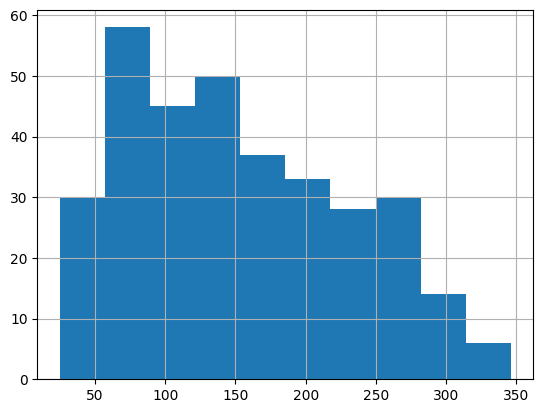

In [292]:
# Explore distribution of values being predicted
diabetes_y_train.hist()

<Axes: >

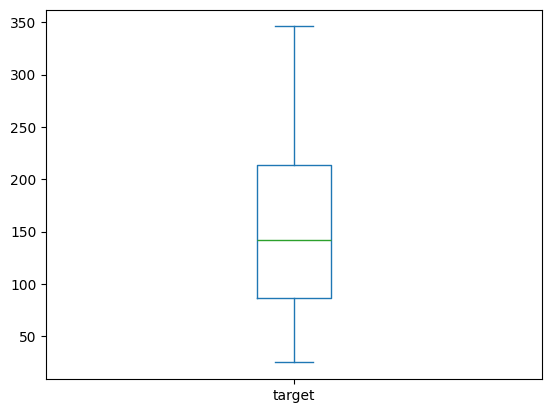

In [293]:
pd.DataFrame(diabetes_y_train).plot(kind="box")

## Storing results

Create a list to store results in.

In [294]:
results_list = []

## Linear Regression

In [295]:
def standardise_data(X_train, X_test):

    # Initialise a new scaling object for normalising input data
    sc = StandardScaler()

    # Apply the scaler to the training and test sets
    train_std=sc.fit_transform(X_train)
    test_std=sc.fit_transform(X_test)

    return train_std, test_std

diabetes_X_train_standardised, diabetes_X_test_standardised = standardise_data(
    diabetes_X_train,
    diabetes_X_test
    )

Mean absolute error: 51.02
Mean absolute percentage error: 48.88%
Root Mean squared error: 62.00
Coefficient of determination: 0.30


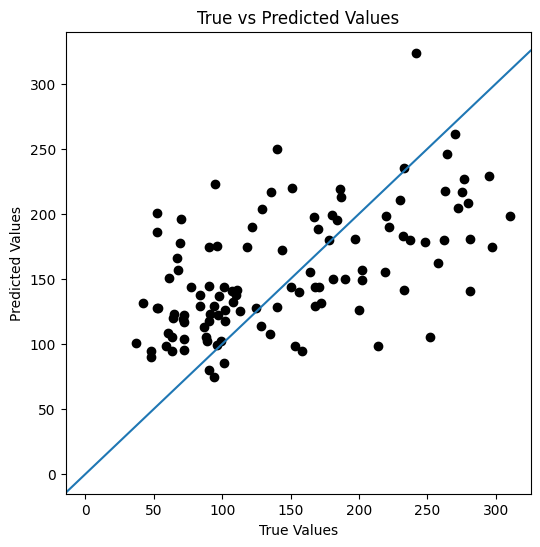

In [296]:
# Use only first feature
single_feat_train = diabetes_X_train_standardised[:, np.newaxis, 2]
single_feat_test = diabetes_X_test_standardised[:, np.newaxis, 2]

# Create linear regression object
regr = LinearRegression()

# Train the model using the training sets
regr.fit(single_feat_train, diabetes_y_train)

# Make predictions using the testing set
diabetes_y_pred = regr.predict(single_feat_test)

print(f"Mean absolute error: {mean_absolute_error(diabetes_y_test, diabetes_y_pred):.2f}")

print(f"Mean absolute percentage error: {mean_absolute_percentage_error(diabetes_y_test, diabetes_y_pred):.2%}" )

print("Root Mean squared error: %.2f" % root_mean_squared_error(diabetes_y_test, diabetes_y_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(diabetes_y_test, diabetes_y_pred))

results_list.append(
    {'model': 'Linear Regression',
     'RMSE': root_mean_squared_error(diabetes_y_test, diabetes_y_pred),
     'MAPE': mean_absolute_percentage_error(diabetes_y_test, diabetes_y_pred)}
)

# Plot outputs
def plot_actual_vs_predicted(actual, predicted):
    fig, ax = plt.subplots(figsize=(6, 6))

    ax.scatter(actual, predicted, color="black")
    ax.axline((1, 1), slope=1)
    plt.xlabel('True Values')
    plt.ylabel('Predicted Values')
    plt.title('True vs Predicted Values')
    plt.show()

def plot_residuals(actual, predicted):
    residuals = actual - predicted

    plt.figure(figsize=(10, 5))
    plt.hist(residuals, bins=20)
    plt.axvline(x = 0, color = 'r')
    plt.xlabel('Residual')
    plt.ylabel('Frequency')
    plt.title('Distribution of Residuals')
    plt.show()

plot_actual_vs_predicted(diabetes_y_test, diabetes_y_pred)

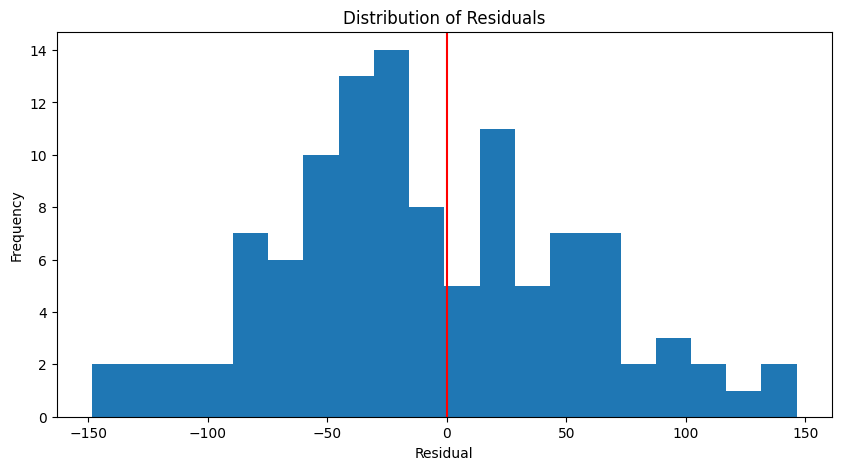

In [297]:
plot_residuals(diabetes_y_test, diabetes_y_pred)

## Multiple Linear Regression

Mean absolute error: 42.42
Mean absolute percentage error: 40.74%
Root Mean squared error: 54.25
Coefficient of determination: 0.47


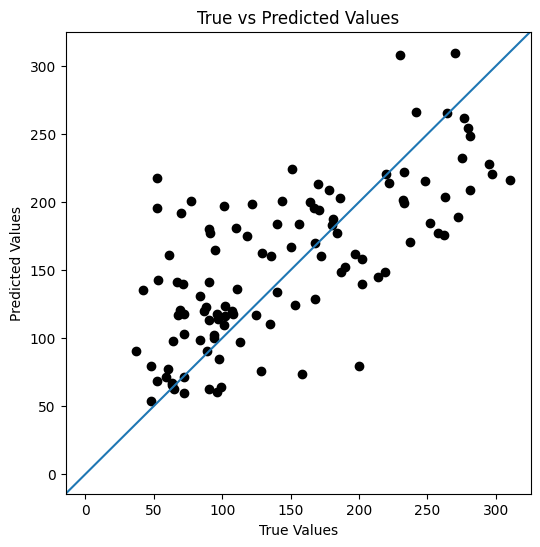

In [298]:
# Create linear regression object
regr = LinearRegression()

# Train the model using the training sets
regr.fit(diabetes_X_train_standardised, diabetes_y_train)

# Make predictions using the testing set
diabetes_y_pred = regr.predict(diabetes_X_test_standardised)

print(f"Mean absolute error: {mean_absolute_error(diabetes_y_test, diabetes_y_pred):.2f}")

print(f"Mean absolute percentage error: {mean_absolute_percentage_error(diabetes_y_test, diabetes_y_pred):.2%}" )

print("Root Mean squared error: %.2f" % root_mean_squared_error(diabetes_y_test, diabetes_y_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(diabetes_y_test, diabetes_y_pred))

results_list.append(
    {'model': 'Multiple Linear Regression',
     'RMSE': root_mean_squared_error(diabetes_y_test, diabetes_y_pred),
     'MAPE': mean_absolute_percentage_error(diabetes_y_test, diabetes_y_pred)}
)

plot_actual_vs_predicted(diabetes_y_test, diabetes_y_pred)

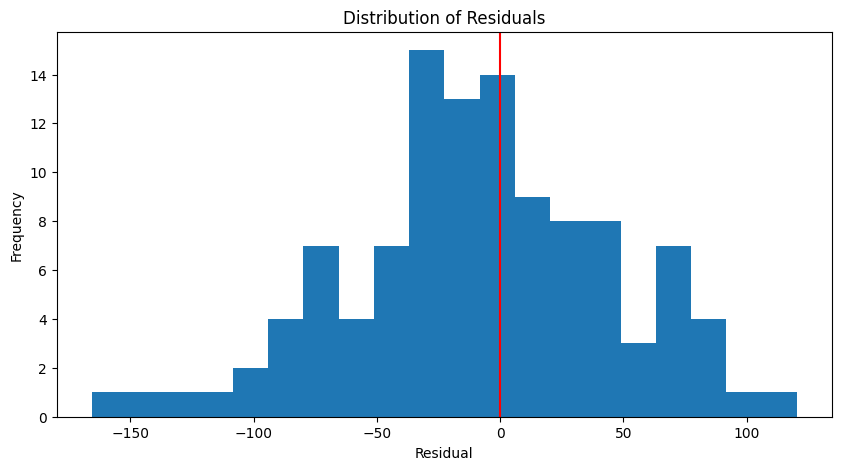

In [299]:
plot_residuals(diabetes_y_test, diabetes_y_pred)

## Decision Tree

Mean absolute error: 57.55
Mean absolute percentage error: 50.68%
Root Mean squared error: 76.00
Coefficient of determination: -0.04


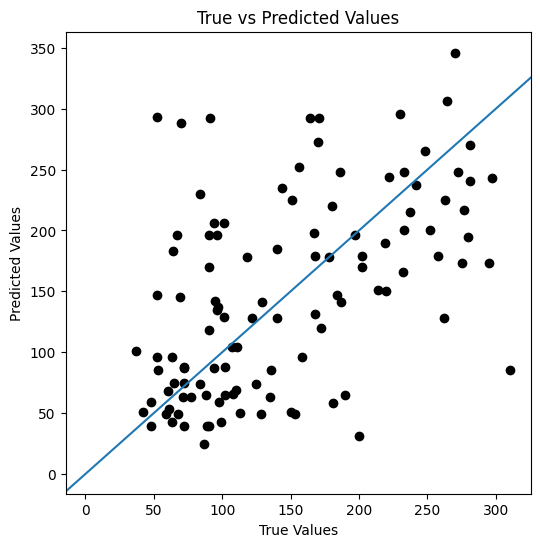

In [300]:
regr_dt = DecisionTreeRegressor(random_state=42)

# Train the model using the training sets
regr_dt.fit(diabetes_X_train, diabetes_y_train)

# Make predictions using the testing set
diabetes_y_pred = regr_dt.predict(diabetes_X_test)

print(f"Mean absolute error: {mean_absolute_error(diabetes_y_test, diabetes_y_pred):.2f}")


print(f"Mean absolute percentage error: {mean_absolute_percentage_error(diabetes_y_test, diabetes_y_pred):.2%}" )

print("Root Mean squared error: %.2f" % root_mean_squared_error(diabetes_y_test, diabetes_y_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(diabetes_y_test, diabetes_y_pred))

results_list.append(
    {'model': 'Decision Tree',
     'RMSE': root_mean_squared_error(diabetes_y_test, diabetes_y_pred),
     'MAPE': mean_absolute_percentage_error(diabetes_y_test, diabetes_y_pred)}
)

plot_actual_vs_predicted(diabetes_y_test, diabetes_y_pred)

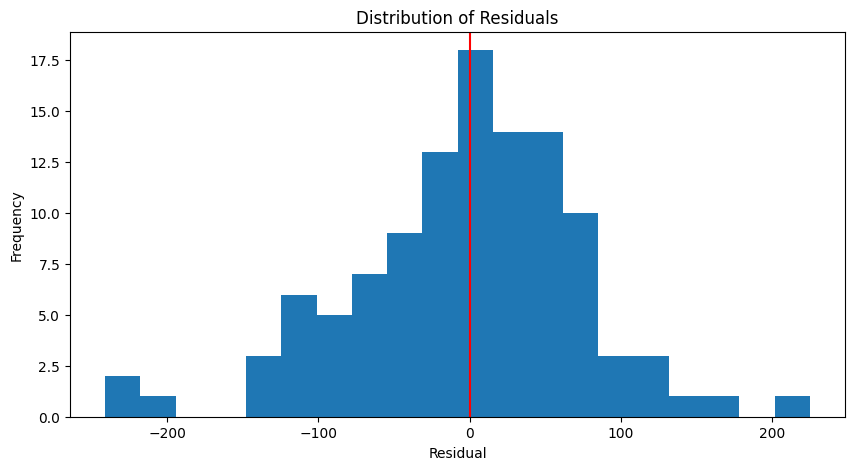

In [301]:
plot_residuals(diabetes_y_test, diabetes_y_pred)

## Random Forest

Mean absolute error: 43.86
Mean absolute percentage error: 40.34%
Root Mean squared error: 54.96
Coefficient of determination: 0.45


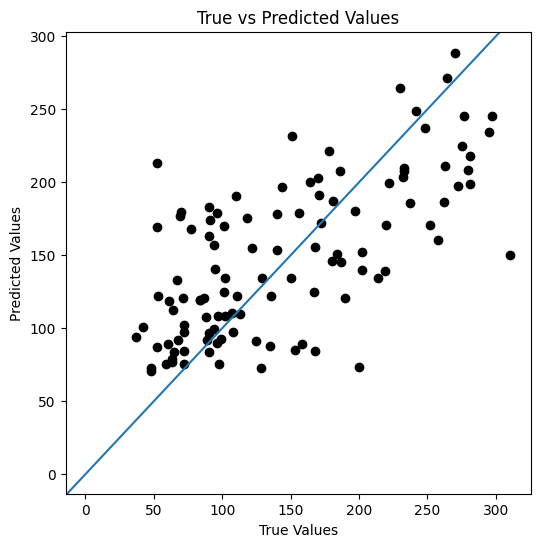

In [302]:
regr_rf = RandomForestRegressor(random_state=42)

# Train the model using the training sets
regr_rf.fit(diabetes_X_train, diabetes_y_train)

# Make predictions using the testing set
diabetes_y_pred = regr_rf.predict(diabetes_X_test)

print(f"Mean absolute error: {mean_absolute_error(diabetes_y_test, diabetes_y_pred):.2f}")


print(f"Mean absolute percentage error: {mean_absolute_percentage_error(diabetes_y_test, diabetes_y_pred):.2%}" )

print("Root Mean squared error: %.2f" % root_mean_squared_error(diabetes_y_test, diabetes_y_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(diabetes_y_test, diabetes_y_pred))

results_list.append(
    {'model': 'Random Forest',
     'RMSE': root_mean_squared_error(diabetes_y_test, diabetes_y_pred),
     'MAPE': mean_absolute_percentage_error(diabetes_y_test, diabetes_y_pred)}
)

plot_actual_vs_predicted(diabetes_y_test, diabetes_y_pred)

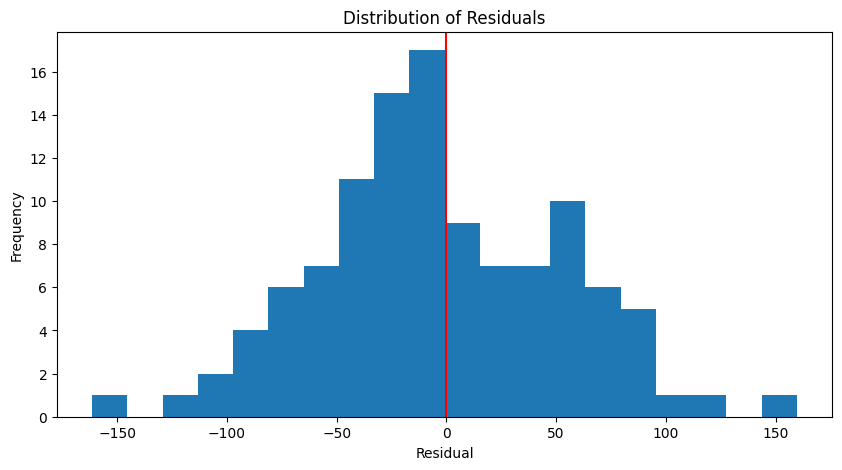

In [303]:
plot_residuals(diabetes_y_test, diabetes_y_pred)

## XGBoost

Mean absolute error: 46.59
Mean absolute percentage error: 39.84%
Root Mean squared error: 58.01
Coefficient of determination: 0.39


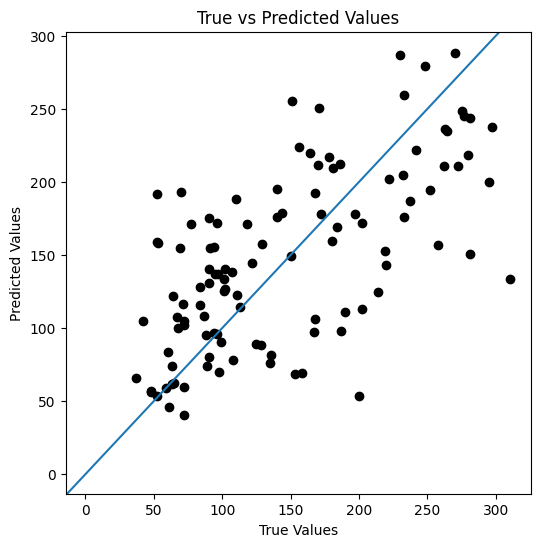

In [304]:
regr_xg = XGBRegressor(random_state=42)

# Train the model using the training sets
regr_xg.fit(diabetes_X_train, diabetes_y_train)

# Make predictions using the testing set
diabetes_y_pred = regr_xg.predict(diabetes_X_test)

print(f"Mean absolute error: {mean_absolute_error(diabetes_y_test, diabetes_y_pred):.2f}")


print(f"Mean absolute percentage error: {mean_absolute_percentage_error(diabetes_y_test, diabetes_y_pred):.2%}" )

print("Root Mean squared error: %.2f" % root_mean_squared_error(diabetes_y_test, diabetes_y_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(diabetes_y_test, diabetes_y_pred))

results_list.append(
    {'model': 'XGBoost',
     'RMSE': root_mean_squared_error(diabetes_y_test, diabetes_y_pred),
     'MAPE': mean_absolute_percentage_error(diabetes_y_test, diabetes_y_pred)}
)

plot_actual_vs_predicted(diabetes_y_test, diabetes_y_pred)

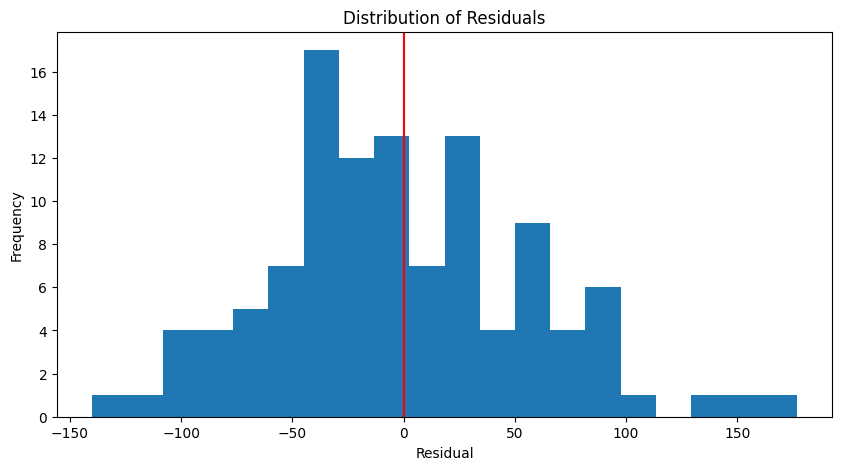

In [305]:
plot_residuals(diabetes_y_test, diabetes_y_pred)

## Light GBM

Mean absolute error: 45.91
Mean absolute percentage error: 40.71%
Root Mean squared error: 57.97
Coefficient of determination: 0.39


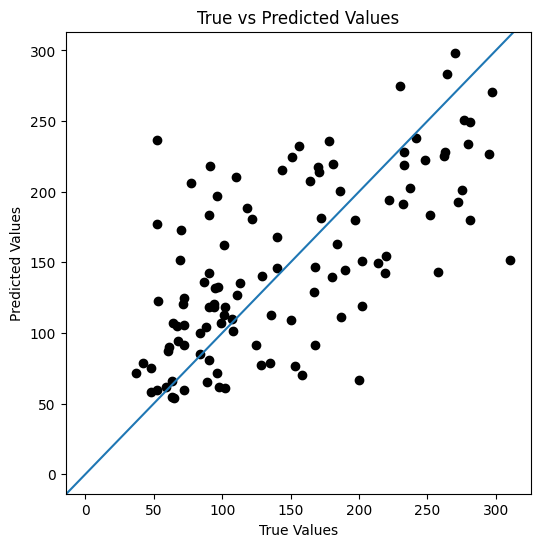

In [306]:
regr_lgbm = LGBMRegressor(random_state=42)

# Train the model using the training sets
regr_lgbm.fit(diabetes_X_train, diabetes_y_train)

# Make predictions using the testing set
diabetes_y_pred = regr_lgbm.predict(diabetes_X_test)

print(f"Mean absolute error: {mean_absolute_error(diabetes_y_test, diabetes_y_pred):.2f}")


print(f"Mean absolute percentage error: {mean_absolute_percentage_error(diabetes_y_test, diabetes_y_pred):.2%}" )

print("Root Mean squared error: %.2f" % root_mean_squared_error(diabetes_y_test, diabetes_y_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(diabetes_y_test, diabetes_y_pred))

results_list.append(
    {'model': 'Light GBM',
     'RMSE': root_mean_squared_error(diabetes_y_test, diabetes_y_pred),
     'MAPE': mean_absolute_percentage_error(diabetes_y_test, diabetes_y_pred)}
)

plot_actual_vs_predicted(diabetes_y_test, diabetes_y_pred)

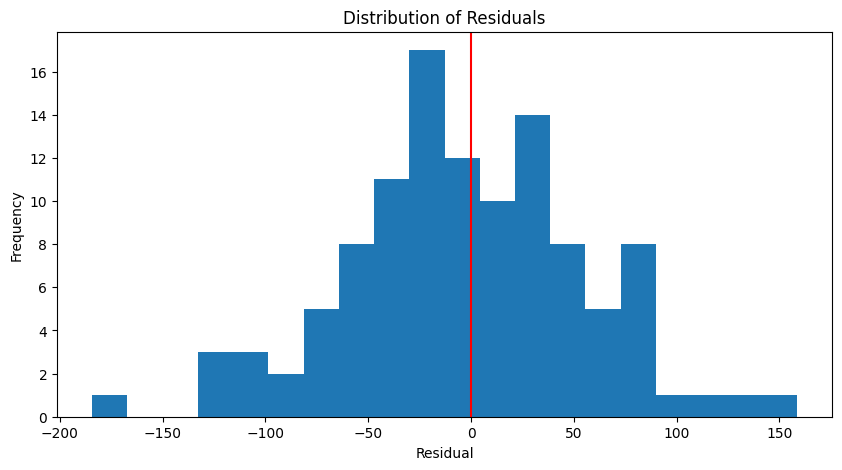

In [307]:
plot_residuals(diabetes_y_test, diabetes_y_pred)

## Catboost

Learning rate set to 0.034381
0:	learn: 76.7698931	total: 1.5ms	remaining: 1.5s
1:	learn: 75.7552747	total: 2.5ms	remaining: 1.25s
2:	learn: 74.8136416	total: 3.54ms	remaining: 1.18s
3:	learn: 73.9549588	total: 4.85ms	remaining: 1.21s
4:	learn: 73.0782030	total: 6.35ms	remaining: 1.26s
5:	learn: 72.1682178	total: 7.69ms	remaining: 1.27s
6:	learn: 71.3682200	total: 8.78ms	remaining: 1.25s
7:	learn: 70.5608211	total: 9.75ms	remaining: 1.21s
8:	learn: 69.7224552	total: 10.9ms	remaining: 1.2s
9:	learn: 68.9543606	total: 12.2ms	remaining: 1.21s
10:	learn: 68.2429798	total: 13.5ms	remaining: 1.21s
11:	learn: 67.5175992	total: 14.8ms	remaining: 1.22s
12:	learn: 66.8114535	total: 16.1ms	remaining: 1.22s
13:	learn: 66.1442549	total: 17.3ms	remaining: 1.22s
14:	learn: 65.5281514	total: 18.5ms	remaining: 1.22s
15:	learn: 64.8807317	total: 19.7ms	remaining: 1.21s
16:	learn: 64.3379117	total: 21.1ms	remaining: 1.22s
17:	learn: 63.7508639	total: 22.4ms	remaining: 1.22s
18:	learn: 63.2097439	total: 2

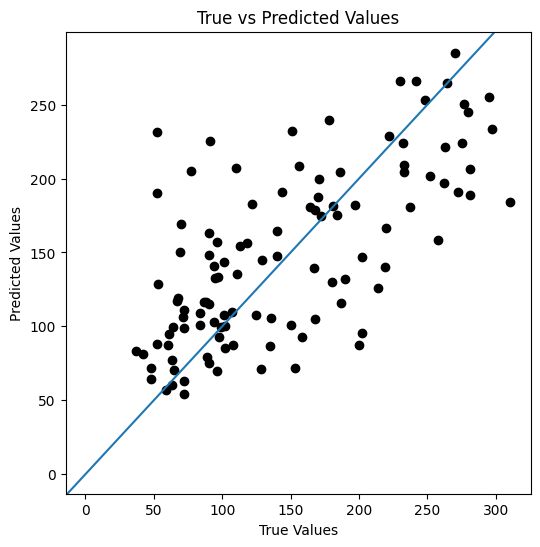

In [308]:
regr_catboost = CatBoostRegressor(random_state=42)

# Train the model using the training sets
regr_catboost.fit(diabetes_X_train, diabetes_y_train)

# Make predictions using the testing set
diabetes_y_pred = regr_catboost.predict(diabetes_X_test)

print(f"Mean absolute error: {mean_absolute_error(diabetes_y_test, diabetes_y_pred):.2f}")


print(f"Mean absolute percentage error: {mean_absolute_percentage_error(diabetes_y_test, diabetes_y_pred):.2%}" )

print("Root Mean squared error: %.2f" % root_mean_squared_error(diabetes_y_test, diabetes_y_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(diabetes_y_test, diabetes_y_pred))

results_list.append(
    {'model': 'CatBoost',
     'RMSE': root_mean_squared_error(diabetes_y_test, diabetes_y_pred),
     'MAPE': mean_absolute_percentage_error(diabetes_y_test, diabetes_y_pred)}
)

plot_actual_vs_predicted(diabetes_y_test, diabetes_y_pred)

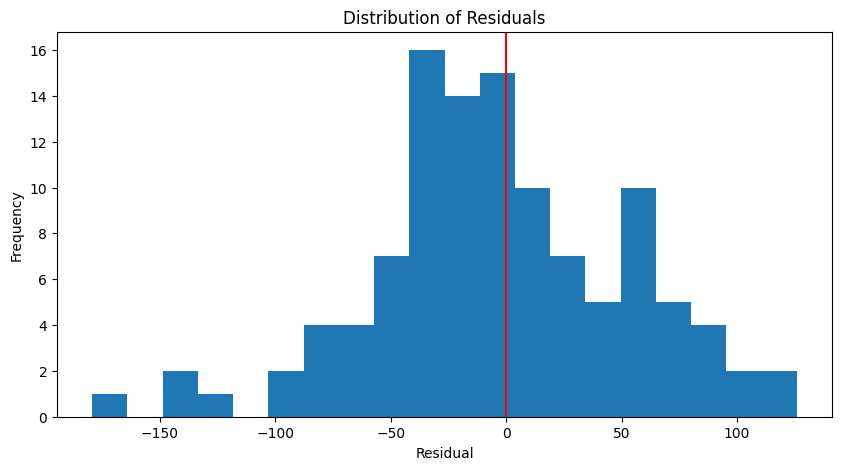

In [309]:
plot_residuals(diabetes_y_test, diabetes_y_pred)

# Compare Results

In [310]:
results_df = pd.DataFrame(results_list)

In [311]:
results_df.sort_values('MAPE')

,model,RMSE,MAPE
6,CatBoost,55.137472,0.393867
4,XGBoost,58.011463,0.398371
3,Random Forest,54.959277,0.403435
5,Light GBM,57.971124,0.407147
1,Multiple Linear Regression,54.253023,0.407386
0,Linear Regression,62.004712,0.488760
2,Decision Tree,76.000948,0.506753


Let's remind ourselves - what's the scale of the output feature?

<Axes: >

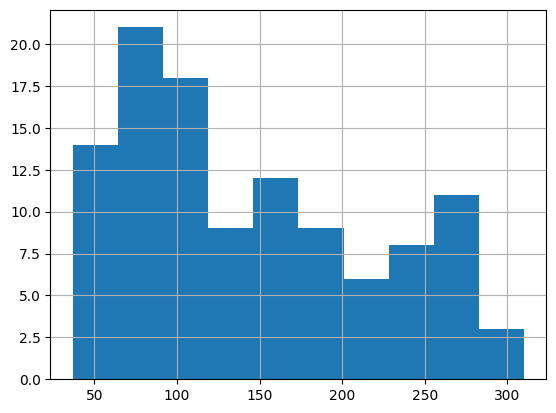

In [312]:
diabetes_y_test.hist()

<Axes: >

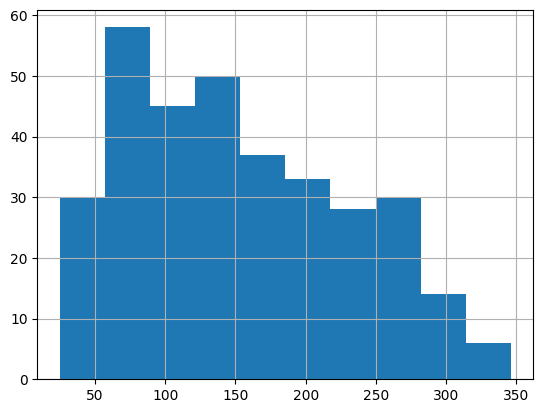

In [313]:
diabetes_y_train.hist()

## Plotting Residuals

Plotting the residuals (errors) can help us to understand whether the model is consistently over or under estimating.